### using all Techniques and Metrics for Stock Price Prediction with Computing Risk
### Remember to the Factors such as market dynamics, news events, and economic conditions can significantly impact stock prices.

### Data Description 

In [5]:
import pandas as pd
# Load the data from CSV file
data = pd.read_csv('BTC-USD.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1462 non-null   object 
 1   Open       1462 non-null   float64
 2   High       1462 non-null   float64
 3   Low        1462 non-null   float64
 4   Close      1462 non-null   float64
 5   Adj Close  1462 non-null   float64
 6   Volume     1462 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 80.1+ KB
None


In [6]:
import pandas as pd
# Load the data from CSV file
data = pd.read_csv('BTC-USD.csv')
print(data.describe())

               Open          High           Low         Close     Adj Close  \
count   1462.000000   1462.000000   1462.000000   1462.000000   1462.000000   
mean   32244.188306  32981.706802  31461.463137  32281.634567  32281.634567   
std    15689.129727  16109.992582  15203.864447  15695.708487  15695.708487   
min     6640.454102   6928.664551   6555.504395   6642.109863   6642.109863   
25%    19974.507812  20350.674804  19604.792480  19986.791992  19986.791992   
50%    29653.407227  30188.492188  29124.975586  29665.659180  29665.659180   
75%    43086.924804  43892.439453  42213.054688  43095.942383  43095.942383   
max    73079.375000  73750.070313  71334.093750  73083.500000  73083.500000   

             Volume  
count  1.462000e+03  
mean   3.196061e+10  
std    1.910277e+10  
min    5.331173e+09  
25%    1.957759e+10  
50%    2.830847e+10  
75%    3.908167e+10  
max    3.509679e+11  


### Moving Average and Percentage Change 

Percentage Change:
Date
2020-04-14         NaN
2020-04-15   -0.029276
2020-04-16    0.071467
2020-04-17   -0.002897
2020-04-18    0.022756
                ...   
2024-04-10    0.020956
2024-04-11   -0.007470
2024-04-12   -0.040889
2024-04-13   -0.050217
2024-04-14    0.030041
Name: Close, Length: 1462, dtype: float64

Moving Average:
Date
2020-04-14             NaN
2020-04-15             NaN
2020-04-16             NaN
2020-04-17             NaN
2020-04-18             NaN
                  ...     
2024-04-10    68504.151042
2024-04-11    68456.795052
2024-04-12    68260.540625
2024-04-13    68008.036589
2024-04-14    67885.868360
Name: Close, Length: 1462, dtype: float64


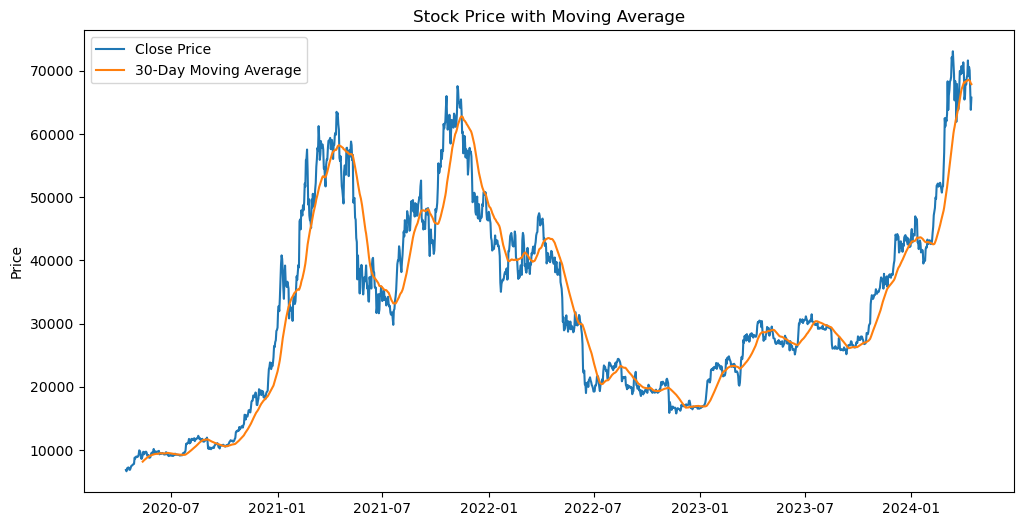

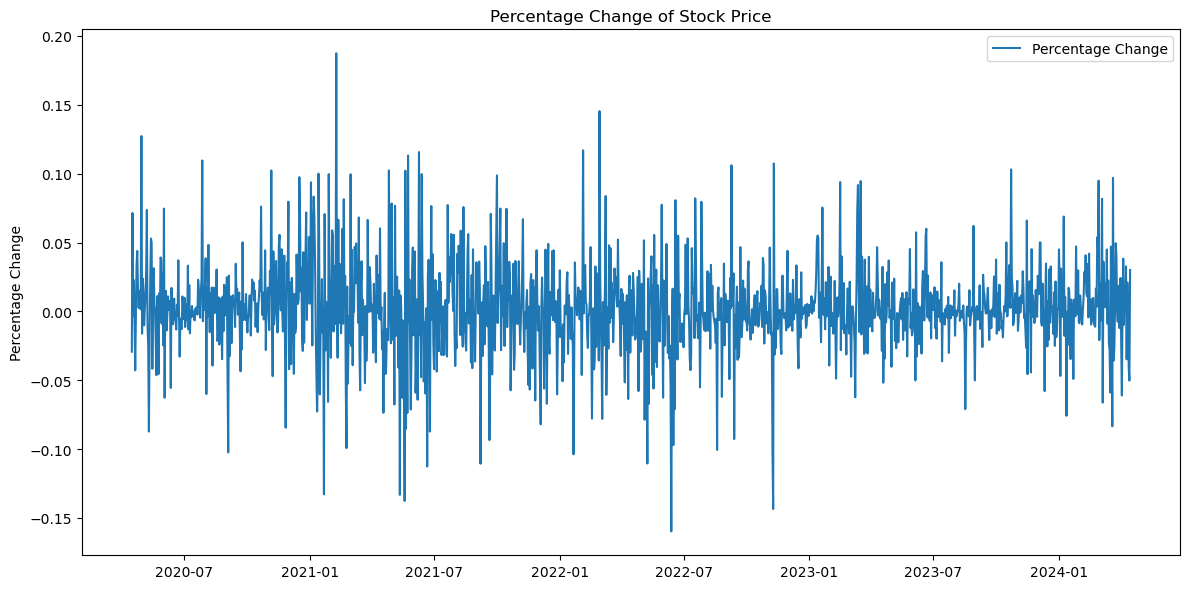

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV file
data = pd.read_csv('BTC-USD.csv')

# Set the date column as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Calculate the moving average
window = 30  # Adjust the window size as needed
moving_average = data['Close'].rolling(window=window).mean()

# Calculate the percentage change
percentage_change = data['Close'].pct_change()


# Print the percentage change and moving average
print("Percentage Change:")
print(percentage_change)

print("\nMoving Average:")
print(moving_average)


# Plot the moving average and percentage change
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, moving_average, label=f'{window}-Day Moving Average')
plt.ylabel('Price')
plt.title('Stock Price with Moving Average')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(data.index, percentage_change, label='Percentage Change')
plt.ylabel('Percentage Change')
plt.title('Percentage Change of Stock Price')
plt.legend()

plt.tight_layout()
plt.show()

### using machine learning techniques in stock price prediction

### Linear Regression 

Root Mean Squared Error (RMSE): 511.6736599834978


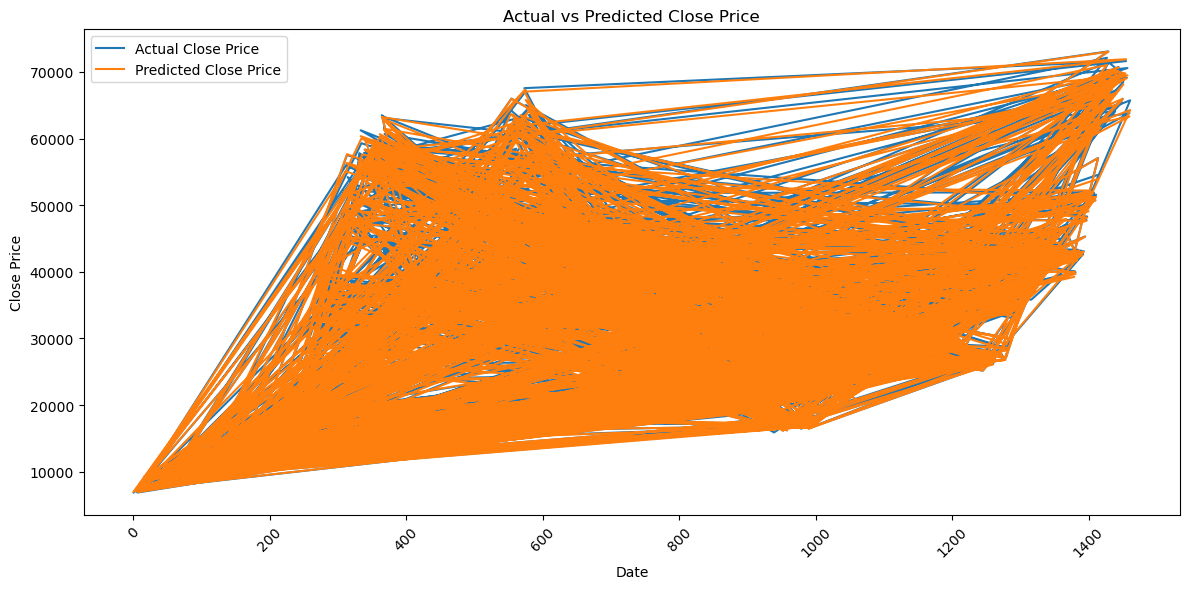

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data from CSV file
data = pd.read_csv('BTC-USD.csv')

# Extract the relevant features (Open, High, Low, Volume) and target variable (Close)
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.8, random_state=42)

# Train the linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Compute the root mean squared error (RMSE) as a measure of risk
rmse = mean_squared_error(y_test, predictions, squared=False)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot the predicted prices and actual prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Close Price')
plt.plot(y_test.index, predictions, label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### compute Risk

In [14]:
# Compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

# Compute root mean squared error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

# Compute average daily return
avg_return = np.mean(y)
print('Average Daily Return:', avg_return)

# Compute standard deviation of daily returns
std_return = np.std(y)
print('Standard Deviation of Daily Returns:', std_return)

# Compute annualized volatility (standard deviation * sqrt(252))
volatility = std_return * np.sqrt(252)
print('Annualized Volatility:', volatility)

# Compute Value at Risk (VaR) at a certain confidence level (e.g., 95%)
confidence_level = 0.95
z_score = np.abs(np.percentile(y, (1 - confidence_level) * 100))
var = z_score * std_return
print('Value at Risk (VaR) at', confidence_level * 100, '% confidence level:', var)

# Compute Conditional Value at Risk (CVaR) at a certain confidence level (e.g., 95%)
cvar = np.mean(y[y <= z_score])
print('Conditional Value at Risk (CVaR) at', confidence_level * 100, '% confidence level:', cvar)

Mean Squared Error (MSE): 0.00017380941886969308
Root Mean Squared Error (RMSE): 0.013183680019997947
Average Daily Return: 0.0020895796918053693
Standard Deviation of Daily Returns: 0.03286808460407101
Annualized Volatility: 0.5217646676004165
Value at Risk (VaR) at 95.0 % confidence level: 0.0016505462256330154
Conditional Value at Risk (CVaR) at 95.0 % confidence level: -0.0026339790696176747


C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not ha

Forcast Data:
              Prediction       Actual
Date                                 
2021-07-20  2.413393e+10  23148267245
2021-07-21  3.942127e+10  28203024559
2021-07-22  1.975362e+10  19555230518
2021-07-23  2.708645e+10  22552046192
2021-07-24  2.448681e+10  21664706865
...                  ...          ...
2024-04-10  4.329247e+10  38318601774
2024-04-11  2.716808e+10  30153382941
2024-04-12  6.298443e+10  44129299406
2024-04-13  6.978169e+10  52869738185
2024-04-14  3.700728e+10  49084320047

[1000 rows x 2 columns]


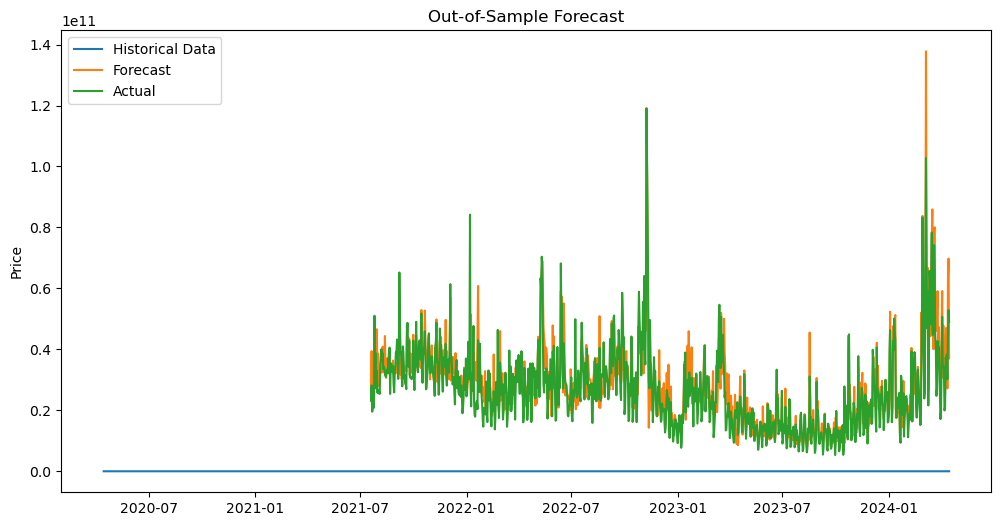

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data from CSV file
data = pd.read_csv('BTC-USD.csv')

# Set the date column as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Define the rolling window size and forecast horizon
window_size = 30  # Adjust the window size as needed
forecast_horizon = 1000  # Adjust the forecast horizon as needed

# Split the data into train and test sets
train_data = data[:-forecast_horizon]
test_data = data[-forecast_horizon:]

# Create empty lists to store predictions and actual values
predictions = []
actual_values = []

# Iterate over the test data using a rolling window
for i in range(len(test_data)):
    # Select the current window of data
    window = train_data[-window_size:]
    
    # Separate the features (X) and target variable (y)
    X_train = window.iloc[:, :-1]
    y_train = window.iloc[:, -1]
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make a prediction for the next time step
    X_test = test_data.iloc[i, :-1].values.reshape(1, -1)
    y_pred = model.predict(X_test)[0]
    
    # Append the prediction and actual value to the lists
    predictions.append(y_pred)
    actual_values.append(test_data.iloc[i, -1])

    # Append the actual value to the training data for the next iteration
    train_data = pd.concat([train_data, test_data.iloc[[i]]])

# Create a DataFrame with the predictions and actual values
forecast_data = pd.DataFrame({'Prediction': predictions, 'Actual': actual_values}, index=test_data.index)

print("Forcast Data:")
print(forecast_data)

# Plot the forecasted values and actual values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Historical Data')
plt.plot(forecast_data.index, forecast_data['Prediction'], label='Forecast')
plt.plot(forecast_data.index, forecast_data['Actual'], label='Actual')
plt.ylabel('Price')
plt.title('Out-of-Sample Forecast')
plt.legend()
plt.show()

### Random Forest Regressor and Gradient Boosting Regressor

Ensemble RMSE: 787.1786484585393


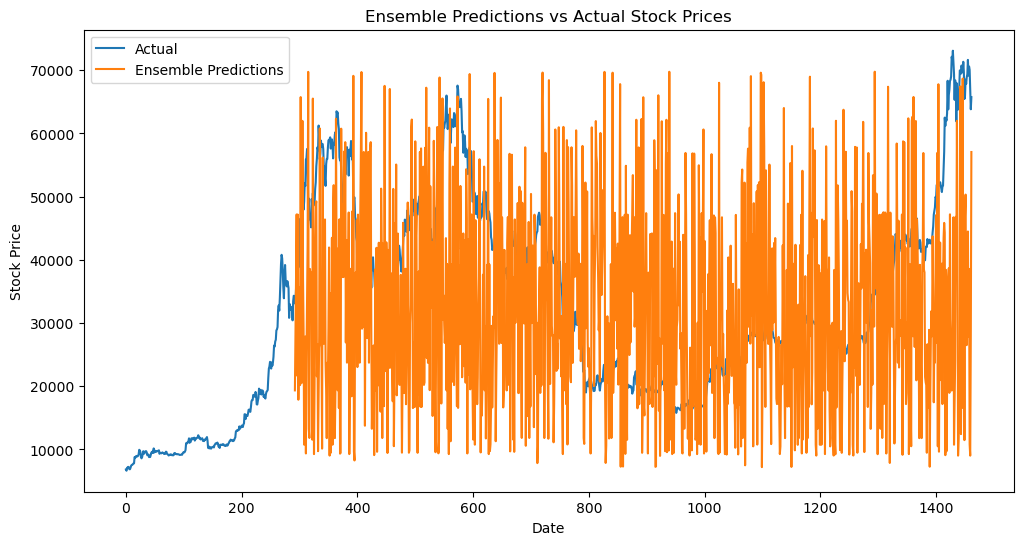

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the data from CSV file
data = pd.read_csv('BTC-USD.csv')

# Extract the relevant features (Open, High, Low, Volume) and target variable (Close)
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.8, random_state=42)

# Create an ensemble of models with custom parameters
models = [
    RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42),
    GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
]

# Train each model in the ensemble
for model in models:
    model.fit(X_train, y_train)

# Make predictions for each model in the ensemble
predictions = []
for model in models:
    model_predictions = model.predict(X_test)
    predictions.append(model_predictions)

# Compute the ensemble prediction
ensemble_predictions = pd.DataFrame(predictions).mean()

# Compute the root mean squared error (RMSE) for the ensemble prediction
rmse = mean_squared_error(y_test, ensemble_predictions, squared=False)
print('Ensemble RMSE:', rmse)

# Visualize the ensemble predictions and actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual')
plt.plot(data.index[-len(y_test):], ensemble_predictions, label='Ensemble Predictions')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Ensemble Predictions vs Actual Stock Prices')
plt.legend()
plt.show()

### EGARCH Model

C:\ProgramData\Anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001079. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 47584.036024982524
Iteration:      2,   Func. Count:     18,   Neg. LLF: 446619.19526645215
Iteration:      3,   Func. Count:     27,   Neg. LLF: 5209484335.124943
Iteration:      4,   Func. Count:     37,   Neg. LLF: -2955.5935543538412
Iteration:      5,   Func. Count:     43,   Neg. LLF: -2956.102964204674
Iteration:      6,   Func. Count:     49,   Neg. LLF: -2959.110836187393
Iteration:      7,   Func. Count:     55,   Neg. LLF: -2982.028165517407
Iteration:      8,   Func. Count:     61,   Neg. LLF: -2989.964474593575
Iteration:      9,   Func. Count:     66,   Neg. LLF: -2990.1353260307715
Iteration:     10,   Func. Count:     71,   Neg. LLF: -2990.162837226514
Iteration:     11,   Func. Count:     76,   Neg. LLF: -2990.2048908398783
Iteration:     12,   Func. Count:     81,   Neg. LLF: -2990.2168183046742
Iteration:     13,   Func. Count:     86,   Neg. LLF: -2990.218756355504
Iteration:     14,   Func. Count:     91,   Neg.

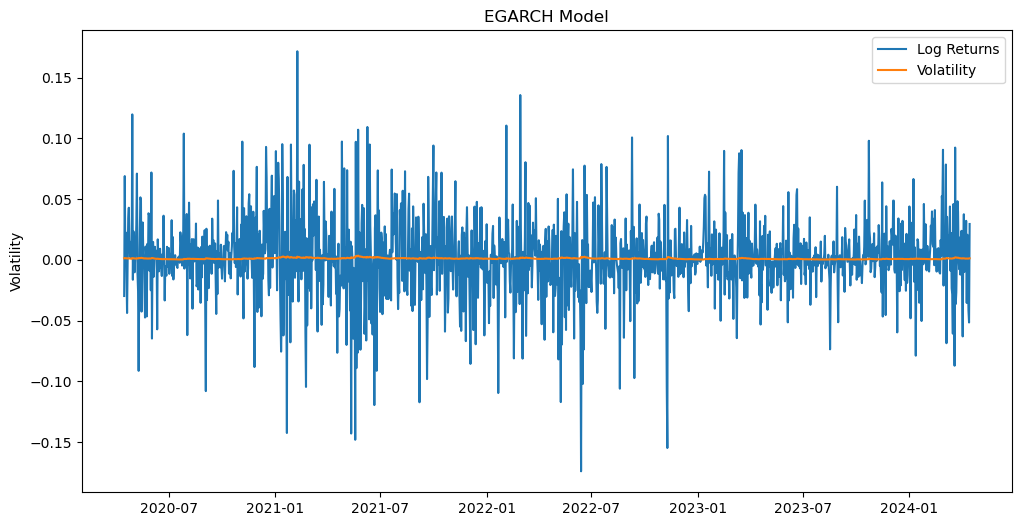

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Load the data from CSV file
data = pd.read_csv('BTC-USD.csv')

# Set the date column as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract the log returns
log_returns = np.log(data['Close']).diff().dropna()

# Fit the EGARCH model
model = arch_model(log_returns, vol='EGARCH', p=1, q=1)
results = model.fit()

# Print the model summary
print(results.summary())

# Forecast volatility
forecasts = results.forecast(start=0)

# Plot the actual volatility and forecasted volatility
plt.figure(figsize=(12, 6))
plt.plot(log_returns.index, log_returns, label='Log Returns')
plt.plot(forecasts.variance, label='Volatility')  # Updated attribute name
plt.ylabel('Volatility')
plt.title('EGARCH Model')
plt.legend()
plt.show()

### ARIMA MOdel

Linear Regression Mean Squared Error (MSE): 1.4396595349323687e-14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1520645576.2657683
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4017.169523246053
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2914682.923184308
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2981.04428705001
            Iterations: 3
            Function evaluations: 34
            Gradient evaluations: 3


C:\ProgramData\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00108. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y bef

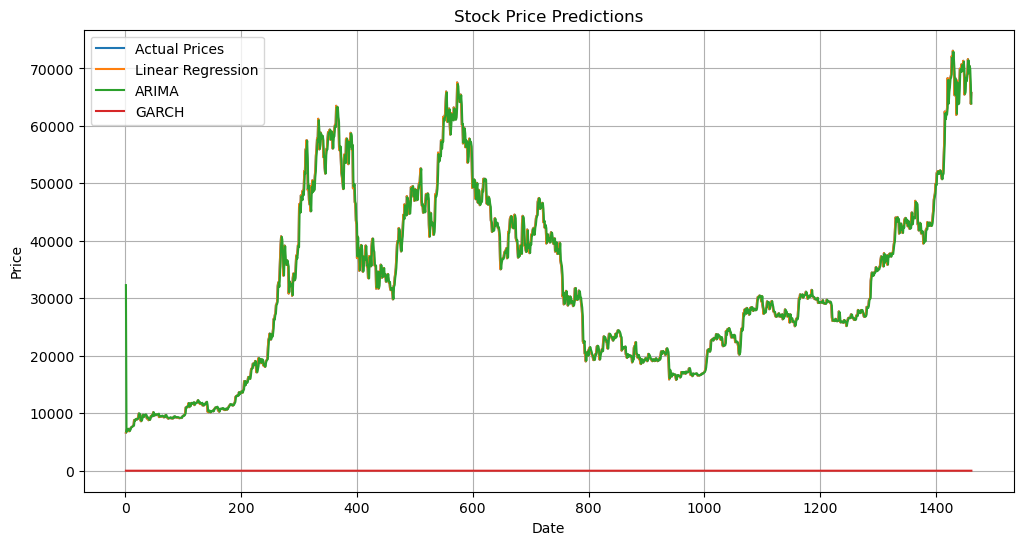

Average Daily Return: 0.0020895796918053693
Standard Deviation of Daily Returns: 0.03286808460407101
Annualized Volatility: 0.5217646676004165
Value at Risk (VaR) at 95.0 % confidence level: -0.0016505462256330154
Conditional Value at Risk (CVaR) at 95.0 % confidence level: -0.07504676174941816


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Load the stock price data from CSV
data = pd.read_csv('BTC-USD.csv')

# Compute daily returns
data['Return'] = data['Close'].pct_change()

# Remove missing values
data = data.dropna()

# Split the data into training and testing sets
X = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
y = data['Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set using linear regression
linear_predictions = linear_model.predict(X_test)

# Compute linear regression mean squared error (MSE)
linear_mse = mean_squared_error(y_test, linear_predictions)
print('Linear Regression Mean Squared Error (MSE):', linear_mse)

# Train ARIMA model
arima_model = ARIMA(data['Close'], order=(1, 0, 1))
arima_model_fit = arima_model.fit()

# Make predictions on the entire dataset using ARIMA
arima_predictions = arima_model_fit.predict(start=0, end=len(data)-1)

# Train GARCH model
garch_model = arch_model(data['Return'], vol='Garch', p=1, q=1)
garch_model_fit = garch_model.fit()

# Make predictions on the entire dataset using GARCH
garch_predictions = garch_model_fit.forecast(horizon=len(data))

# Plot the actual prices, linear regression predictions, ARIMA predictions, and GARCH predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Actual Prices')
plt.plot(data.index, linear_model.predict(X), label='Linear Regression')
plt.plot(data.index, arima_predictions, label='ARIMA')
plt.plot(data.index, garch_predictions.variance.values[-1, :], label='GARCH')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Predictions')
plt.legend()
plt.grid(True)
plt.show()

# Compute average daily return
avg_return = np.mean(data['Return'])
print('Average Daily Return:', avg_return)

# Compute standard deviation of daily returns
std_return = np.std(data['Return'])
print('Standard Deviation of Daily Returns:', std_return)

# Compute annualized volatility (standard deviation * sqrt(252))
volatility = std_return * np.sqrt(252)
print('Annualized Volatility:', volatility)

# Compute Value at Risk (VaR) at a certain confidence level (e.g., 95%)
confidence_level = 0.95
z_score = np.percentile(data['Return'], (1 - confidence_level) * 100)
var = z_score * std_return
print('Value at Risk (VaR) at', confidence_level * 100, '% confidence level:', var)

# Compute Conditional Value at Risk (CVaR) at a certain confidence level (e.g., 95%)
cvar = np.mean(data['Return'][data['Return'] <= z_score])
print('Conditional Value at Risk (CVaR) at', confidence_level * 100, '% confidence level:', cvar)

### Using Deep Learning techniques in stock price prediction

### LSTM

Epoch 1/10
36/36 [==============================] - 10s 41ms/step - loss: 0.0204
Epoch 2/10
36/36 [==============================] - 2s 42ms/step - loss: 0.0028
Epoch 3/10
36/36 [==============================] - 2s 42ms/step - loss: 0.0021
Epoch 4/10
36/36 [==============================] - 2s 42ms/step - loss: 0.0019
Epoch 5/10
36/36 [==============================] - 2s 43ms/step - loss: 0.0017
Epoch 6/10
36/36 [==============================] - 2s 43ms/step - loss: 0.0015
Epoch 7/10
36/36 [==============================] - 2s 43ms/step - loss: 0.0015
Epoch 8/10
36/36 [==============================] - 2s 43ms/step - loss: 0.0014
Epoch 9/10
36/36 [==============================] - 1s 42ms/step - loss: 0.0015
Epoch 10/10
9/9 [==============================] - 2s 15ms/step


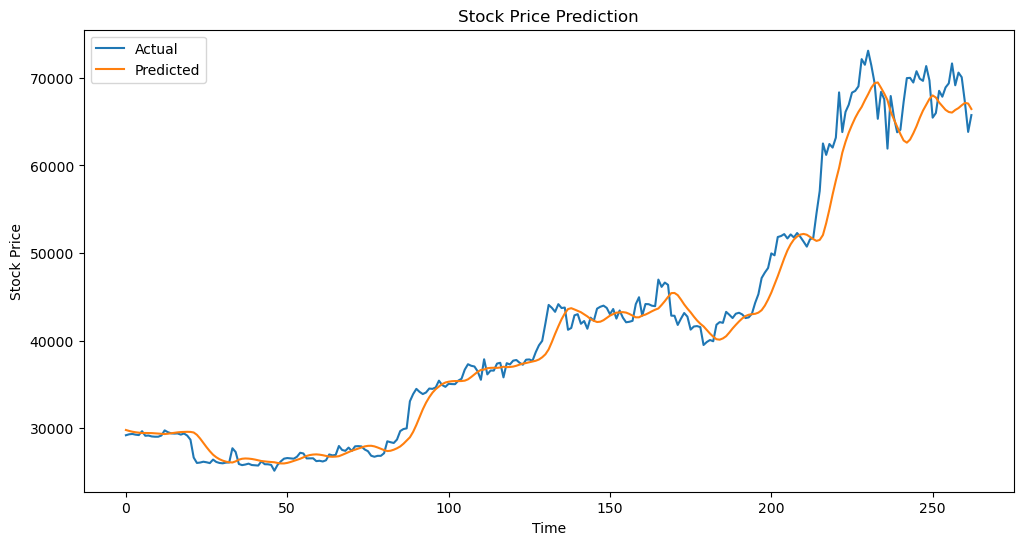

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("BTC-USD.csv")

# Extract the 'Close' prices
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Define the window size for input sequences
window_size = 30

# Prepare the training data
X_train = []
y_train = []
for i in range(window_size, len(train_data)):
    X_train.append(train_data[i - window_size:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape input data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Prepare the test data
X_test = []
y_test = []
for i in range(window_size, len(test_data)):
    X_test.append(test_data[i - window_size:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape input data for LSTM (samples, time steps, features)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predicted_data = model.predict(X_test)
predicted_data = scaler.inverse_transform(predicted_data)

# Compare predictions with actual values
actual_data = scaler.inverse_transform(test_data[window_size:])

# Visualize the predicted and actual values
plt.figure(figsize=(12, 6))
plt.plot(actual_data, label='Actual')
plt.plot(predicted_data, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

### using NLP for Sentiment Analysis

In [20]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the CSV file
df = pd.read_csv("bitcoin_news.csv")

# Create an instance of SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each news article
sentences = []
polarities = []
subjectivities = []
for description in df['Description']:
    if isinstance(description, str):  # Check if description is a string
        sentences.append(description)
        sentiment = sia.polarity_scores(description)
        polarities.append(sentiment['compound'])
        subjectivities.append(sentiment['compound'])

# Create a DataFrame to store the results
sentiment_df = pd.DataFrame({'Sentence': sentences,
                             'Polarity': polarities,
                             'Subjectivity': subjectivities})

# Display the results
print(sentiment_df)

                                             Sentence  Polarity  Subjectivity
0   A jury convicted Roman Sterlingov of money lau...    0.1280        0.1280
1   Jian Wen, 42, from north London, was involved ...    0.4939        0.4939
2   The Grayscale Bitcoin Trust (GBTC), a prominen...    0.4939        0.4939
3   The U.S. Securities and Exchange Commission (S...    0.4779        0.4779
4   An early Bitcoin (BTC) miner has moved a signi...    0.2023        0.2023
..                                                ...       ...           ...
94  Bitcoin is getting jittery before the big ‘hal...    0.2023        0.2023
95  This year’s Bitcoin “halving” event will be di...    0.1280        0.1280
96  Former crypto king Sam Bankman-Fried faces the...   -0.7650       -0.7650
97  Le Bitcoin va vivre son quatrième halving. Cet...   -0.1280       -0.1280
98  More than a decade ago, Movie2K was one of the...   -0.3291       -0.3291

[99 rows x 3 columns]


In [21]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER resources (only required once)
nltk.download('vader_lexicon')

# Load the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Read the text file
with open('JPMorgan Joins Goldman Sachs In Ser.txt', 'r') as file:
    text = file.read()

# Split the text into sentences
sentences = nltk.sent_tokenize(text)

# Initialize an empty list to store the sentiment analysis results
results = []

# Perform sentiment analysis on each sentence
for sentence in sentences:
    # Calculate sentiment scores
    scores = sid.polarity_scores(sentence)
    
    # Store the sentence, polarity, and subjectivity in a dictionary
    result = {
        'Sentence': sentence,
        'Polarity': scores['compound'],
        'Subjectivity': scores['compound']  # VADER doesn't provide subjectivity scores
    }
    
    # Append the result to the results list
    results.append(result)

# Create a dataframe from the results list
df = pd.DataFrame(results, columns=['Sentence', 'Polarity', 'Subjectivity'])

# Print the dataframe
print(df)

                                             Sentence  Polarity  Subjectivity
0   JPMorgan Joins Goldman Sachs In Serious Bitcoi...    0.1280        0.1280
1   Its halving could accelerate this trend and sp...    0.3400        0.3400
2   Some crypto miners may face a difficult road a...    0.5994        0.5994
3   What's Next For Bitcoin Prices After Their Lat...    0.0000        0.0000
4   What's next for bitcoin prices after the crypt...    0.0000        0.0000
5                          Several analysts weigh in.    0.0000        0.0000
6   Bitcoin Prices Just Dropped To Their Lowest Si...   -0.7003       -0.7003
7   16 Upcoming Bitcoin Events To Mark On Your Cal...    0.6249        0.6249
8   ‘Disable iMessage ASAP’—‘High-Risk’ Alert Issu...    0.4019        0.4019
9   The C-Suite’s Hottest New Job—The Chief AI Off...    0.4767        0.4767
10  Takeaways From The Bitcoin Policy Summit, Wher...    0.6908        0.6908
11  Shock Leak Reveals China Could Be About To Blo...   -0.5423 

[nltk_data] Downloading package vader_lexicon to C:\Users\ِAli
[nltk_data]     Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the CSV data into a pandas DataFrame
# Assuming the file is encoded in 'latin-1' (replace with the actual encoding if known)
df = pd.read_csv("sentiment_analysis.csv", encoding='latin-1')
print(df.head())


                                            Sentence  Polarity  Subjectivity
0  A jury convicted Roman Sterlingov of money lau...    0.1280        0.1280
1  Jian Wen, 42, from north London, was involved ...    0.4939        0.4939
2  The Grayscale Bitcoin Trust (GBTC), a prominen...    0.4939        0.4939
3  The U.S. Securities and Exchange Commission (S...    0.4779        0.4779
4  An early Bitcoin (BTC) miner has moved a signi...    0.2023        0.2023


In [24]:
print(df.describe())

         Polarity  Subjectivity
count  115.000000    115.000000
mean     0.096650      0.096650
std      0.457577      0.457577
min     -0.920100     -0.920100
25%     -0.120950     -0.120950
50%      0.128000      0.128000
75%      0.476700      0.476700
max      0.878100      0.878100


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      115 non-null    object 
 1   Polarity      115 non-null    float64
 2   Subjectivity  115 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.8+ KB
None


C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Sentence Polarity (Pattern)')

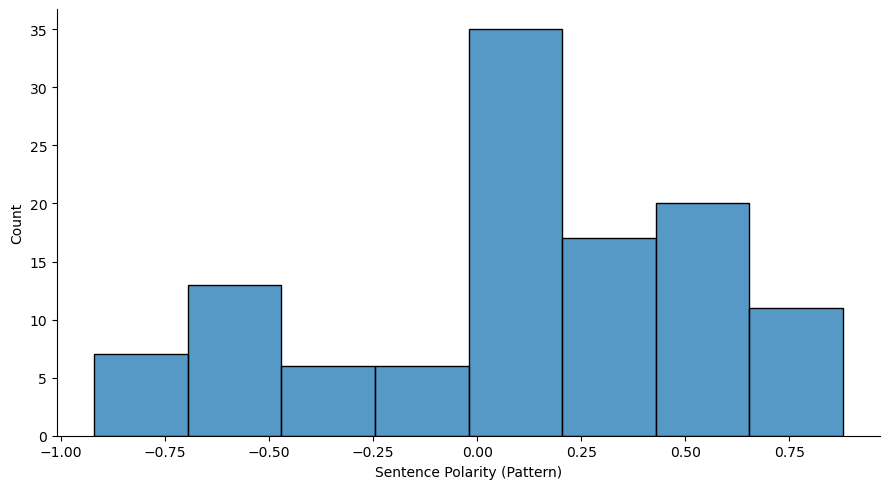

In [34]:
sns.displot(df["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Pattern)")

C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Sentence Subjectivity (Pattern)')

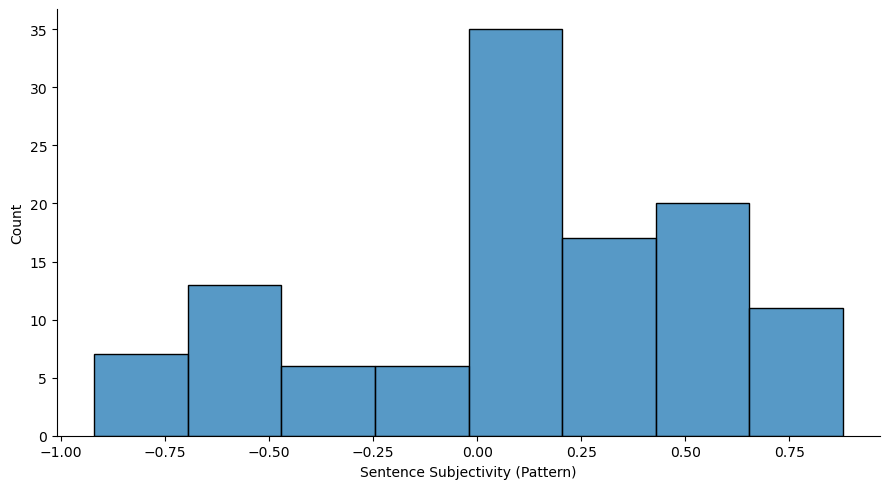

In [35]:
sns.displot(df["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Pattern)")